In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
data=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [58]:
X= data.iloc[:,0:1]
y= data.iloc[:,-1]

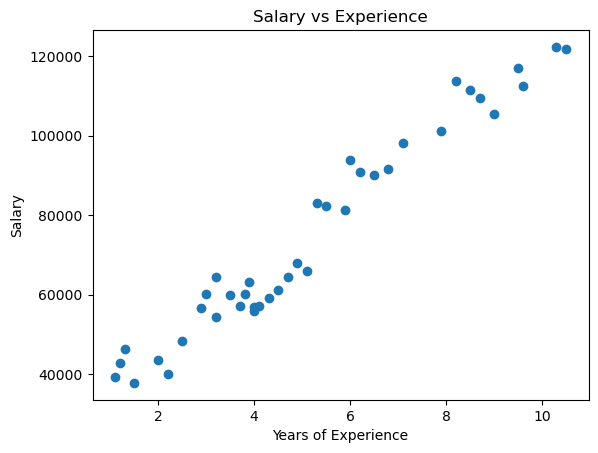

In [72]:
plt.scatter(X,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [59]:
X

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0
5,2.2
6,2.5
7,2.9
8,3.0
9,3.2


In [60]:
y

0      39343
1      42774
2      46205
3      37731
4      43525
5      39891
6      48266
7      56642
8      60150
9      54445
10     64445
11     60000
12     57189
13     60200
14     63218
15     55794
16     56957
17     57081
18     59095
19     61111
20     64500
21     67938
22     66029
23     83088
24     82200
25     81363
26     93940
27     91000
28     90000
29     91738
30     98273
31    101302
32    113812
33    111620
34    109431
35    105582
36    116969
37    112635
38    122391
39    121872
Name: Salary, dtype: int64

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
X_test

,Experience Years
27,6.2
9,3.2
14,3.9
0,1.1
2,1.3
30,7.1
13,3.8
36,9.5


In [64]:
y_test

27     91000
9      54445
14     63218
0      39343
2      46205
30     98273
13     60200
36    116969
Name: Salary, dtype: int64

In [68]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\bhavy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84174.40735952])

In [69]:
lr.predict(X_test)

array([ 84174.40735952,  55284.72051045,  62025.6474419 ,  35061.9397161 ,
        36987.91883938,  92841.31341423,  61062.65788026, 115953.06289349])

In [70]:
lr.coef_

array([9629.89561636])

In [71]:
lr.intercept_

24469.054538114055

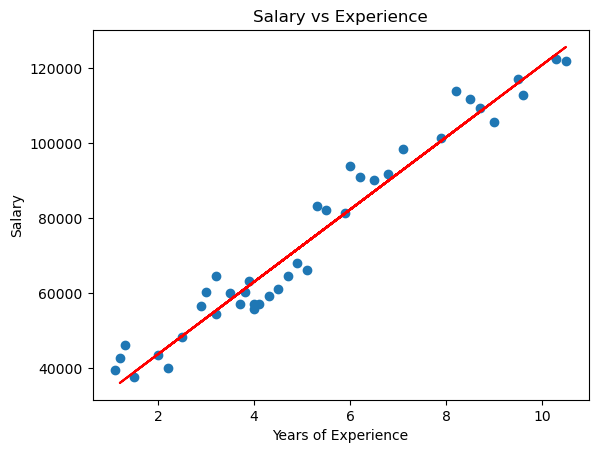

In [75]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()